In [1]:
from simi.run_simulation import *
from matplotlib import pyplot as plt

T1: 30.00 us
T2: 15.00 us
T2 limit: 21.22 kHz
broadening condition:
28.284271247461906 kHz


In [2]:
def run_all(args=qubit_args):
    matrix = []

    detunings = np.linspace(
        -args["detuning_span"] / 2,
        args["detuning_span"] / 2,
        args["detuning_points"],
    )

    amplitudes = np.linspace(0.0001, args["rabi_frequency"], args["rabi_points"])

    for i, amp in enumerate(amplitudes):
        print(f"Amplitude = {i}/{len(amplitudes)}")
        args["rabi_frequency"] = amp
        vec = parallel_map(single_run_change_dict, detunings, task_args=(args,))
        matrix.append(vec)

    return detunings, amplitudes, np.array(matrix)


def FWHM(X, Y, plot=False, echo=False):

    if echo:

        def gaussian(x, A, mu, sigma, d):
            return -A * np.exp(-((x - mu) ** 2) / (2 * sigma**2)) + d

    else:

        def gaussian(x, A, mu, sigma, d):
            return A * np.exp(-((x - mu) ** 2) / (2 * sigma**2)) + d

    if plot:
        plt.plot(X, Y)

    X = np.array(X)
    Y = np.array(Y)

    Y = gaussian_filter(Y, 1)

    if plot:
        plt.plot(X, Y)

    A0 = max(Y) - min(Y)
    mu0 = 0
    # sigma0 = (max(X) - min(X)) / 6  # Initial guess for standard deviation
    sigma0 = 40e3
    d0 = np.mean(Y)

    initial_guess = [A0, mu0, sigma0, d0]
    bounds = ([0, min(X), 0, -1], [1, max(X), max(X), 1])

    # print(initial_guess)

    try:
        popt, pcov = curve_fit(gaussian, X, Y, p0=initial_guess, bounds=bounds)
        mu = popt[1]
        sigma = popt[2]
        fwhm = 2 * np.sqrt(2 * np.log(2)) * sigma  # FWHM for Gaussian
        snr = abs(popt[0]) / abs(popt[3])

        if plot:
            plt.plot(X, gaussian(X, *popt), "r--", label="Gaussian Fit")
            plt.axvline(x=fwhm / 2 + mu, color="k", linestyle="--")
            plt.axvline(x=-fwhm / 2 + mu, color="k", linestyle="--")
            plt.axvline(x=mu, color="k", linestyle="--")
            plt.show()

        if fwhm > 0.12 * 2 * np.pi * MHz or abs(mu) > max(abs(X)) / 3:
            # print("FWHM is larger than the range of X values.")
            return 0, 0, 0
        return mu, fwhm, snr
    except Exception as e:
        print("Error in FWHM calculation:", e)
        return 0, 0, 0


def find_fwhm(x, y, z):
    FWHMs = []
    SNRs = []
    for zi in z:
        try:
            mu, fwhm, snr = FWHM(x, zi, echo=True)
        except:
            fwhm = None
            snr = None
            print("no FWHM!")
        FWHMs.append(fwhm)
        SNRs.append(snr)

    return np.array(FWHMs), np.array(SNRs)


def plot_2d(ax: plt.Axes, x, y, z, **kwargs):

    sc = ax.pcolormesh(
        x / 2 / pi / T2_limit, y / 2 / pi / MHz, z, **kwargs
    )

    if max(x) <= 1 * 2 * np.pi * MHz / 2:
        # fwhms, snrs = find_fwhm(x, y, z)

        fwhms = np.array([FWHM(x, zi, echo=True)[1] for zi in z]) / T2_limit

        print("FWHMs:", fwhms)

        ax.axvline(x=-1 / 2, color="r", linestyle="--", label="T2")
        ax.axvline(x=1 / 2, color="r", linestyle="--", label="T2")
        ax.plot(-fwhms[1:] / 2 / pi / 2, y[1:] / 2 / pi / MHz, ".g")
        ax.plot(fwhms[1:] / 2 / 2 / pi, y[1:] / 2 / pi / MHz, ".g")

    ax.set_xlabel("Detuning [MHz]")
    ax.set_ylabel("Rabi Amplitude [MHz]")
    # ax.set_ylim([0, amplitudes[-1] / 2 / pi / MHz])
    # ax.set_xlim([detunings[0] / 2 / pi / MHz, detunings[-1] / 2 / pi / MHz])

    return ax, sc

In [3]:
# qubit_args["rabi_points"] = 101
# qubit_args["detuning_points"] = 101
# qubit_args["detuning_span"] = 10 * 2 * pi * MHz

# x1, y1, z1 = run_all(qubit_args)
qubit_args["rabi_frequency"] = 50 * 2 * pi * MHz
qubit_args["rabi_points"] = 21
qubit_args["detuning_points"] = 21
qubit_args["detuning_span"] = 0.2 * 2 * pi * MHz

x2, y2, z2 = run_all(qubit_args)

Amplitude = 0/21
Amplitude = 1/21
Amplitude = 2/21
Amplitude = 3/21
Amplitude = 4/21
Amplitude = 5/21
Amplitude = 6/21
Amplitude = 7/21
Amplitude = 8/21
Amplitude = 9/21
Amplitude = 10/21
Amplitude = 11/21
Amplitude = 12/21
Amplitude = 13/21
Amplitude = 14/21
Amplitude = 15/21
Amplitude = 16/21
Amplitude = 17/21
Amplitude = 18/21
Amplitude = 19/21
Amplitude = 20/21


FWHMs: [ 4.43873121  7.23559273  7.3197693   7.45138646  7.61404978  7.79161863
  7.97132007  8.14441267  8.30771777  8.46028227  8.60374864  8.74040275
  8.87319074  9.00370559  9.13602154  9.27269974  9.41562829  9.56421625
  9.71904538  9.87702974 10.03611652]


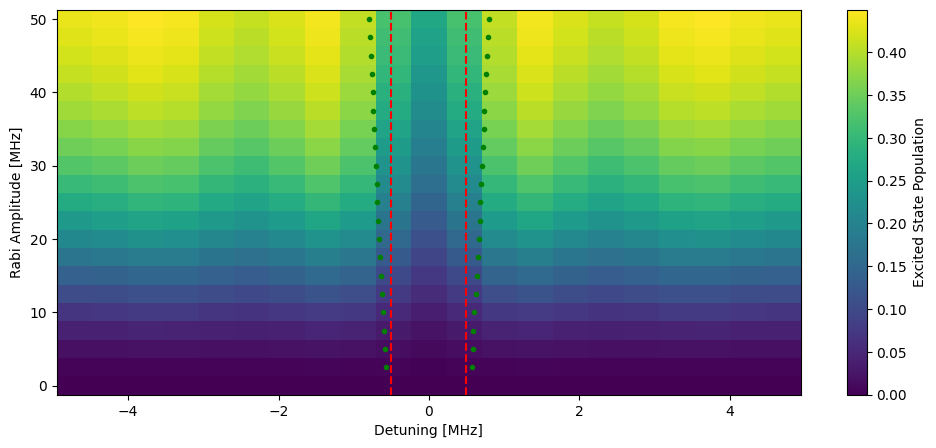

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(12, 5))

# ax, sc1= plot_2d(axs[0], x1, y1, z1)

ax, sc2 = plot_2d(axs, x2, y2, z2)

plt.colorbar(sc2, ax=axs, label="Excited State Population")



Amplitude = 0/51
Amplitude = 1/51
Amplitude = 2/51
Amplitude = 3/51
Amplitude = 4/51
Amplitude = 5/51
Amplitude = 6/51
Amplitude = 7/51
Amplitude = 8/51
Amplitude = 9/51
Amplitude = 10/51
Amplitude = 11/51
Amplitude = 12/51
Amplitude = 13/51
Amplitude = 14/51
Amplitude = 15/51
Amplitude = 16/51
Amplitude = 17/51
Amplitude = 18/51
Amplitude = 19/51
Amplitude = 20/51
Amplitude = 21/51
Amplitude = 22/51
Amplitude = 23/51
Amplitude = 24/51
Amplitude = 25/51
Amplitude = 26/51
Amplitude = 27/51
Amplitude = 28/51
Amplitude = 29/51
Amplitude = 30/51
Amplitude = 31/51
Amplitude = 32/51
Amplitude = 33/51
Amplitude = 34/51
Amplitude = 35/51
Amplitude = 36/51
Amplitude = 37/51
Amplitude = 38/51
Amplitude = 39/51
Amplitude = 40/51
Amplitude = 41/51
Amplitude = 42/51
Amplitude = 43/51
Amplitude = 44/51
Amplitude = 45/51
Amplitude = 46/51
Amplitude = 47/51
Amplitude = 48/51
Amplitude = 49/51
Amplitude = 50/51
Amplitude = 0/51
Amplitude = 1/51
Amplitude = 2/51
Amplitude = 3/51
Amplitude = 4/51
Amplitu

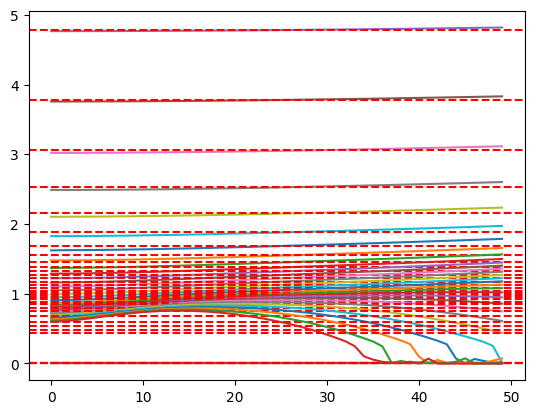

In [5]:


lengths = np.arange(2 * us, 70 * us, 2 * us)


def find(args,lengths,plot=False):
    args["rabi_points"] = 51
    args["detuning_points"] = 51
    args["detuning_span"] = 0.2 * 2 * pi * MHz

    fwhms_list = []
    snrs_list = []

    for l in lengths:
        args["pulse_length"] = l

        x, y, z = run_all(args)

        fwhms, snrs = find_fwhm(x, y, z)

        fwhm_avg = np.mean(fwhms[1:])

        fwhms_list.append(fwhm_avg)
        snrs_list.append(np.max(snrs[1:]))
        
        if plot:
            plt.plot(fwhms[1:]/2/pi/T2_limit)
            plt.axhline(
                y=fwhm_avg/2/pi/T2_limit,
                color="r",
            linestyle="--",
            label="Avg FWHM: {:.2f} MHz".format(fwhm_avg / 2 / pi / MHz),
        )

    return fwhms_list, snrs_list


find(qubit_args,lengths,plot=True)
plt.show()


Amplitude = 0/51
Amplitude = 1/51
Amplitude = 2/51
Amplitude = 3/51
Amplitude = 4/51
Amplitude = 5/51
Amplitude = 6/51
Amplitude = 7/51
Amplitude = 8/51
Amplitude = 9/51
Amplitude = 10/51
Amplitude = 11/51
Amplitude = 12/51
Amplitude = 13/51
Amplitude = 14/51
Amplitude = 15/51
Amplitude = 16/51
Amplitude = 17/51
Amplitude = 18/51
Amplitude = 19/51
Amplitude = 20/51
Amplitude = 21/51
Amplitude = 22/51
Amplitude = 23/51
Amplitude = 24/51
Amplitude = 25/51
Amplitude = 26/51
Amplitude = 27/51
Amplitude = 28/51
Amplitude = 29/51
Amplitude = 30/51
Amplitude = 31/51
Amplitude = 32/51
Amplitude = 33/51
Amplitude = 34/51
Amplitude = 35/51
Amplitude = 36/51
Amplitude = 37/51
Amplitude = 38/51
Amplitude = 39/51
Amplitude = 40/51
Amplitude = 41/51
Amplitude = 42/51
Amplitude = 43/51
Amplitude = 44/51
Amplitude = 45/51
Amplitude = 46/51
Amplitude = 47/51
Amplitude = 48/51
Amplitude = 49/51
Amplitude = 50/51
Amplitude = 0/51
Amplitude = 1/51
Amplitude = 2/51
Amplitude = 3/51
Amplitude = 4/51
Amplitu

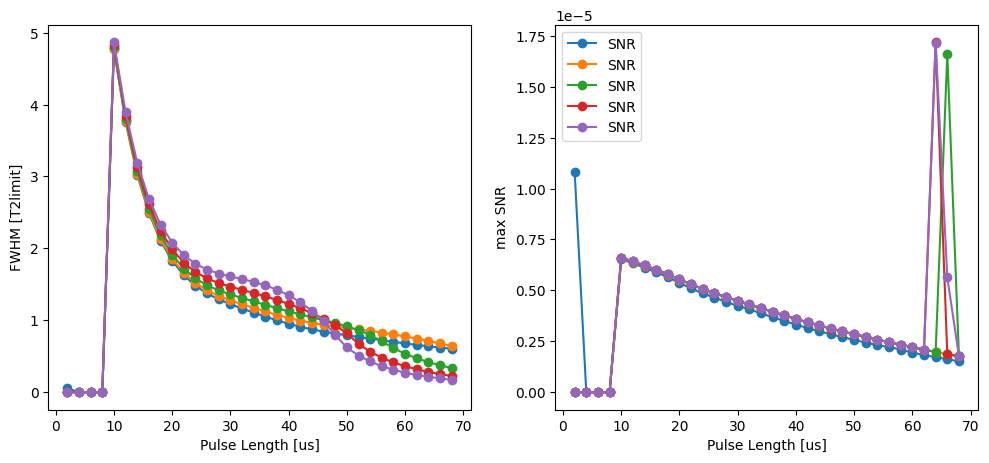

In [6]:


fig, axs = plt.subplots(1,2, figsize=(12, 5))

cutoffs = np.linspace(1e-5, 5e-4, 5)

for c in cutoffs:
    qubit_args["cutoff"] = c
    fwhms_list, snrs_list = find(qubit_args,lengths)

    x = np.array(lengths) / us
    y1 = np.array(fwhms_list) / T2_limit/2/pi
    y2 = np.array(snrs_list) / T2_limit/2/pi

    axs[0].plot(x, y1, 'o-', label='FWHM')
    axs[1].plot(x, y2, 'o-', label='SNR')
    axs[0].set_xlabel('Pulse Length [us]')
    axs[0].set_ylabel('FWHM [T2limit]')
    axs[1].set_xlabel('Pulse Length [us]')
    axs[1].set_ylabel('max SNR')
    plt.legend()
plt.show()